# Logistic Regression

This exercise will solve two exercises involving Logistic Regression. 

In the first one, we will train a model to predict if a student gets admitted into a university based on the results of two exams. On the second one, we will predict wheter microchips from a fabrication plant passes quality assurance based on two test results. In this case, we will use a regularized logistic regression.

# Regular Logistic Regression

### Importing the data

The data contain three columns: the first and the second will create the X matrix and the third the Y matrix.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('ex1data1.txt', delimiter=',')
x = data[:,0]
y = data[:,1]
m = len(x)
x = x.reshape(m,1)
y = y.reshape(m,1)

plt.scatter(x, y, marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Food Truck Profits')
plt.show()

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ex2data1.txt', sep=",", header=None, names=['Exam_1', 'Exam_2', 'admission'])
x = np.array(data[['Exam_1', 'Exam_2']])
y = np.array(data[['admission']])

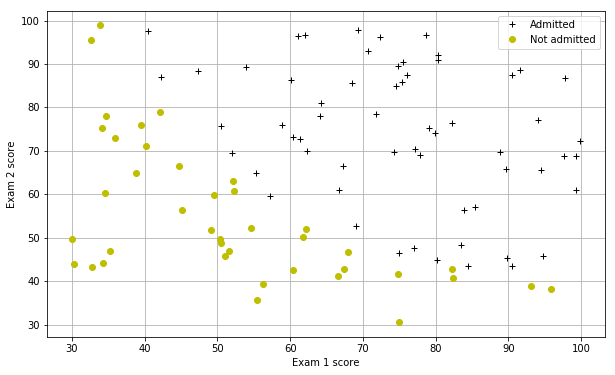

In [66]:
def plotData(pos, neg):
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])
plotData(pos, neg)

In [156]:
m, n = x.shape

one = np.ones((m,1))
x = np.concatenate((one, x), axis=1)

initial_theta = np.zeros([n+1, 1])

In [136]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

first_term = -y * np.log(sigmoid(np.matmul(x, initial_theta)))
second_term = (1 - y) * np.log(1 - sigmoid(np.matmul(x, initial_theta)))
(-first_term - second_term).sum()

-13.862943611198906

In [149]:
def compute_cost(theta, x, y):
    m = len(y)
    
    first_term = -y * np.log(sigmoid(x @ theta))
    second_term = (1 - y) * np.log(1 - sigmoid(x @ theta))
    J = (1/m) * (first_term - second_term).sum()
    
    return J

def gradient(theta, x, y):
    m = len(y)
    
    grad = (1/m) * (((sigmoid(x @ theta) - y).T) @ x)
    return grad

In [153]:
def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m;
    return grad.flatten();

a = Gradient(initial_theta, x, y)
b = gradient(initial_theta, x, y)
a == b
initial_theta

array([[0.],
       [0.],
       [0.]])

In [164]:
Result = op.minimize(fun = compute_cost,x0 = initial_theta, args = (x, y),method = 'TNC',options={'max_iter':400})
Result

c:\users\luiz\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: max_iter
  """Entry point for launching an IPython kernel.


     fun: 67.3011735028624
     jac: array([ 0.00317613,  0.00804619, -0.05149019])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 48
     nit: 11
  status: 1
 success: True
       x: array([ 4.09268647e-01, -2.30831939e-05, -3.25548951e-05])

In [157]:
import scipy.optimize as op

Result = op.minimize(fun = compute_cost,x0 = initial_theta, args = (x, y),method = 'TNC',jac = gradient)
optimal_theta = Result.x;


ValueError: tnc: invalid gradient vector from minimized function.

In [138]:
gradient(initial_theta, x, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [119]:
compute_cost(initial_theta, x, y)

c:\users\luiz\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\luiz\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


nan

In [127]:
x @ theta

array([[46.52967049],
       [38.83634166],
       [45.74992136],
       [53.2982303 ],
       [54.8754225 ],
       [44.27992985],
       [55.52361808],
       [48.31575182],
       [56.70387128],
       [49.59324265],
       [50.81736663],
       [45.12338432],
       [55.75780334],
       [57.41665614],
       [47.11503   ],
       [52.63568046],
       [48.36212276],
       [46.92508592],
       [56.71772949],
       [48.91094948],
       [46.04209317],
       [55.09522834],
       [43.87811996],
       [39.68431792],
       [53.37929029],
       [50.44509432],
       [49.00236194],
       [50.38301183],
       [46.41726278],
       [44.75629695],
       [50.83743535],
       [52.49130067],
       [47.0471207 ],
       [48.29565298],
       [46.28092835],
       [45.36979829],
       [50.55698717],
       [53.01700989],
       [47.27253364],
       [45.88427207],
       [52.04208798],
       [43.68080211],
       [56.00245787],
       [48.59740178],
       [43.37409065],
       [46

In [124]:
-y * np.log(sigmoid(x @ theta))

array([[ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [-0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
      

In [105]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [108]:
theta = np.array([-24, 0.2, 0.2]).T

In [110]:
theta

array([-24. ,   0.2,   0.2])

In [111]:
theta.shape

(3,)

In [117]:
theta =  initial_theta
theta[0] = 24
theta[1] = 0.2
theta[2] = 0.2

In [118]:
theta

array([[24. ],
       [ 0.2],
       [ 0.2]])

In [116]:
initial_theta

array([[24.],
       [ 0.],
       [ 0.]])